Number of classes: 37
Number of training samples: 3312
Number of validation samples: 368
Number of test samples: 3669


Image shape: (256, 256, 3)
Image dtype: <dtype: 'float32'>


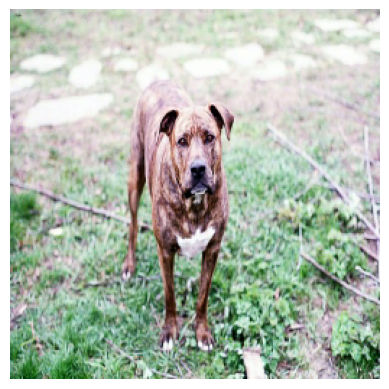

Image shape: (256, 256, 3)
Image dtype: <dtype: 'float32'>


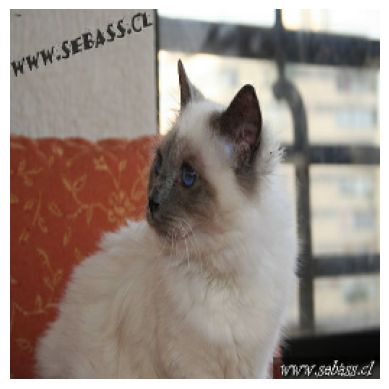

Image shape: (256, 256, 3)
Image dtype: <dtype: 'float32'>


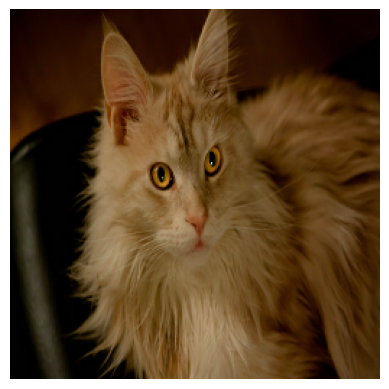

Image shape: (256, 256, 3)
Image dtype: <dtype: 'float32'>


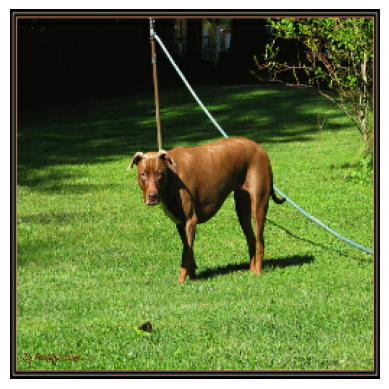

Image shape: (256, 256, 3)
Image dtype: <dtype: 'float32'>


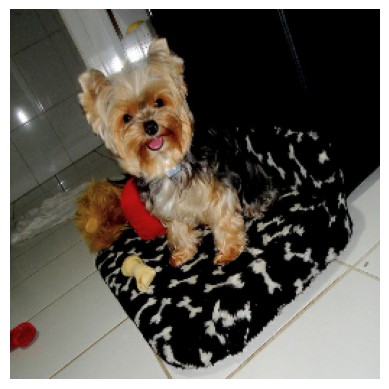

Image shape: (256, 256, 3)
Image dtype: <dtype: 'float32'>


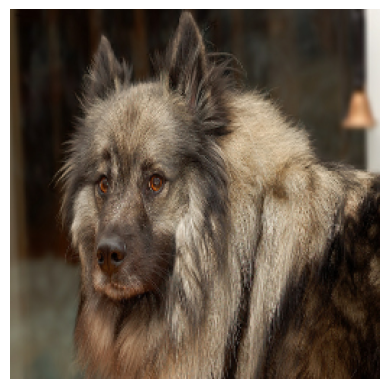

Image shape: (256, 256, 3)
Image dtype: <dtype: 'float32'>


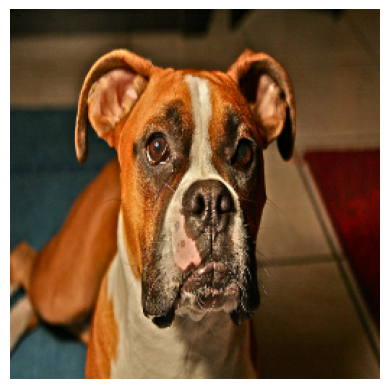

Image shape: (256, 256, 3)
Image dtype: <dtype: 'float32'>


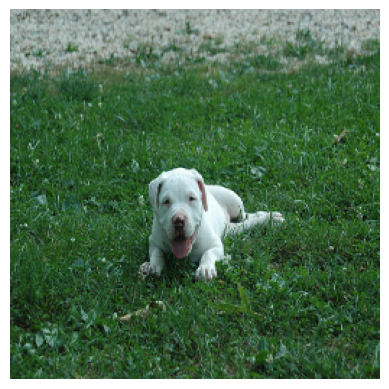

Image shape: (256, 256, 3)
Image dtype: <dtype: 'float32'>


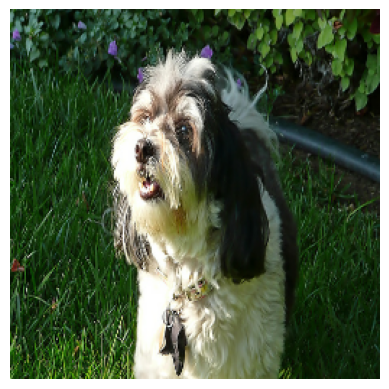

2025-03-17 17:16:56.446827: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [14]:
from data_loading import OxfordPetDataset
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from augmentation import augmentation_layers_geometric, augmentation_layers_color, augmentation_layers_noise_filter, batch
from models import UNet_model #2.a, 2.b exercises
from collections import Counter
# Load the data
dataset = OxfordPetDataset()
dataset.load_data()
#dataset.one_hot_encoding()

# Resize and normalize
reshape_size = (256, 256)
dataset.res_norm(reshape_size)

test = dataset.test_raw

print("\n")

for i, example in enumerate(test.take(9)):  # Take two examples
    image = example['image']
    print("Image shape:", image.shape)
    print("Image dtype:", image.dtype)

    # Plot and save
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.imsave("output_image9.png", image.numpy())
    plt.show()
    
plt.show()

In [ ]:
import cv2
import numpy as np
from point_segmentation import create_gaussian_heatmap
import tensorflow as tf
import os
import tensorflow as tf
from models import (
    split_image,
    split_heatmap,
    clip_normalize,
    remove_cls_token,
    CLIPEncoderLayer
)
 
model_path = "Clip_model.keras"
 
custom_objects = {
    "split_image": split_image,
    "split_heatmap": split_heatmap,
    "clip_normalize": clip_normalize,
    "remove_cls_token": remove_cls_token,
    "CLIPEncoderLayer": CLIPEncoderLayer
}
 
try:
    model = tf.keras.models.load_model(
        model_path,
        custom_objects=custom_objects,
        compile=False,
        safe_mode=False
    )
    print("Model loaded successfully!")
 
except Exception as e:
    print(f"Error loading model: {e}")

2025-03-17 17:45:48.035132: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-17 17:45:48.047657: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 17:45:48.143694: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 17:45:48.267748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742233548.407895   49896 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742233548.43

✅ Model loaded successfully!


In [ ]:
image_path = "/home/noxiusk/Desktop/data_science/cv/CV_Assignment/src/output_image8.png"
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
image = image / 255.0
pred_mask_global = None

def mouse_callback(event, x, y, flags, param):
    global pred_mask_global
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Clicked at: ({x}, {y})")
        # Generate the gaussian heatmap
        heatmap = create_gaussian_heatmap(mask_shape=(image.shape[0], image.shape[1], 1),
                                          loc=(y, x), sigma=10)
        input_data = np.concatenate([image, heatmap], axis=-1)
        input_data = np.expand_dims(input_data, axis=0)

        # Predict the mask
        pred_mask = model.predict(input_data, verbose=0)
        pred_mask = np.squeeze(pred_mask)  # shape: (H, W)
        pred_mask = (pred_mask > 0.5).astype(np.uint8) * 255
        pred_mask_global = pred_mask

# Create a single window with no toolbar and bind the mouse callback
cv2.namedWindow("Image", cv2.WINDOW_AUTOSIZE | cv2.WINDOW_GUI_NORMAL)
cv2.setMouseCallback("Image", mouse_callback)
print("Click on the image window to generate a mask. Press 'ESC' or close the window to exit.")

while True:
    display_img = (image * 255).astype(np.uint8).copy()
    
    # If a mask has been generated, overlay it with a colormap
    if pred_mask_global is not None:
        colored_mask = cv2.applyColorMap(pred_mask_global, cv2.COLORMAP_JET)
        display_img = cv2.addWeighted(display_img, 0.7, colored_mask, 0.3, 0)
    
    cv2.imshow("Image", display_img)
    key = cv2.waitKey(1)
    if key == 27 or cv2.getWindowProperty("Image", cv2.WND_PROP_VISIBLE) <= 0:
        break

cv2.destroyAllWindows()

Click on the image window to generate a mask. Press 'ESC' or close the window to exit.
Clicked at: (221, 172)
